<a href="https://colab.research.google.com/github/GiangAnhTuan-20146450/Bai-Tap-AI/blob/main/AI_W11_14_04_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_test.shape

(10000,)

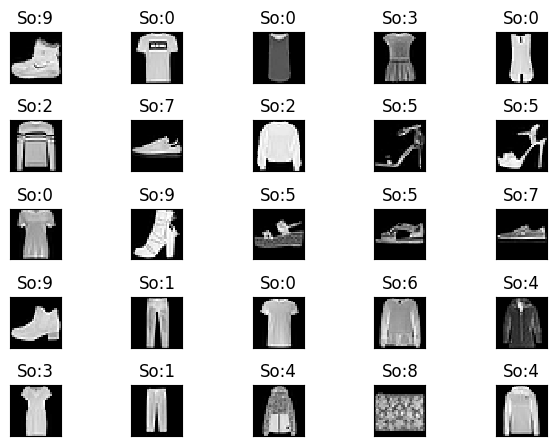

In [ ]:
import matplotlib.pyplot as plt
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title('So:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

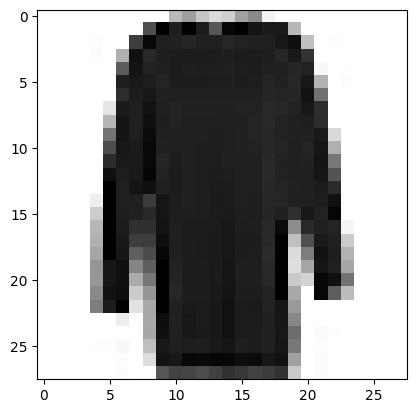

So nay la 2


In [ ]:
digit = x_train[350]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print('So nay la',y_train[350])

In [ ]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [ ]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [ ]:
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(28,28,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

In [ ]:
from keras import optimizers
from keras.losses import categorical_crossentropy
model.compile(loss=categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
train = model.fit(x_train,y_train,batch_size=64,epochs=20,verbose=1)

Epoch 1/20
938/938 [==============================] - 5s 5ms/step - loss: 0.4330 - accuracy: 0.8434
Epoch 2/20
938/938 [==============================] - 4s 5ms/step - loss: 0.2705 - accuracy: 0.9014
Epoch 3/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2267 - accuracy: 0.9162
Epoch 4/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1949 - accuracy: 0.9284
Epoch 5/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1726 - accuracy: 0.9355
Epoch 6/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1513 - accuracy: 0.9430
Epoch 7/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1320 - accuracy: 0.9503
Epoch 8/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1124 - accuracy: 0.9582
Epoch 9/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0972 - accuracy: 0.9625
Epoch 10/20
938/938 [==============================] - 4s 5ms/step - loss: 0.0830 - accuracy: 0.9681

In [ ]:
model.save('test1.h5')

Test loss: 0.4673907160758972
Test accuracy 0.9208999872207642


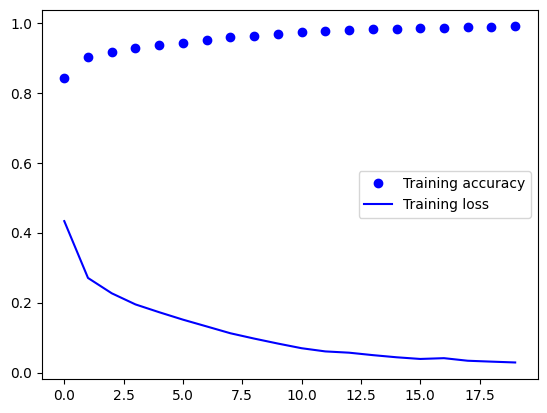

In [ ]:
test = model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',test[0])
print('Test accuracy',test[1])
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label='Training accuracy')
plt.plot(epochs,loss,'b',label='Training loss')
plt.legend()
plt.show()